# Project 2: Analysis of Personal Biometric Data

## Introduction
In this project, I analyze my personal biometric data collected over several weeks as part of a broader effort to optimize my health, fitness, and recovery. I began tracking these metrics to better understand how daily behaviors, including sleep, caloric intake, and exercise, impact my cardiovascular and metabolic health. During this period, I also implemented a structured strength training program, a calorie restricted diet to promote fat loss, and regular zone 2 cardiovascular exercise to improve aerobic capacity and recovery. Monitoring biometrics allowed me to track how these interventions affected various physiological markers over time.

Some of the data, such as resting heart rate, heart rate variability, sleep time, blood oxygen saturation, skin temperature deviation and zone minutes, were collected automatically through a Fitbit device. Other variables, such as calorie intake and sleep quality, were manually recorded. The goal of this analysis is to explore how lifestyle factors such as sleep quantity, sleep quality, caloric balance and exercise influence health indicators like resting heart rate, heart rate variability, and overall recovery status.

Before discussing the specific variables involved in this project, it is important to have a solid understanding of some basic physiology. Several of the variables, including heart rate variability, resting heart rate, and skin temperature deviation, reflect activity within the body's Autonomic Nervous System (ANS).

### What is Autonomic Nervous System?
The Autonomic Nervous System (ANS) regulates involuntary physiological functions such as heart rate, digestion, and respiratory rate. It consists of two branches, the Sympathetic Nervous System (fight or flight), which increases heart rate and prepares the body for immediate action and the Parasympathetic Nervous System (rest and digest), which slows the heart rate and promotes recovery and healing. Higher heart rate variability (HRV) and lower resting heart rate (RestHR) typically reflect stronger parasympathetic activity, indicating better recovery and cardiovascular health. Conversely, lower HRV and elevated RestHR signal increased sympathetic nervous system activity, which are signs of physiological stress. Elevated skin temperature deviation may also indicate sympathetic tone, stress, or inflammation. Understanding the balance between sympathetic and parasympathetic activity is necessary for interpreting how factors like sleep and caloric deficit influence physiological recovery.

## Variable Descriptions

### Resting Heart Rate (`RestHR`)
Resting Heart Rate measures the number of heartbeats per minute when the body is at complete rest, typically during sleep or while not moving throughout the day. A lower resting heart rate is generally associated with better cardiovascular fitness, recovery, and autonomic nervous system balance. Tracking `RestHR` can reveal trends related to physical conditioning, fatigue, stress, and overtraining.

### Heart Rate Variability (`HRV`)
Heart Rate Variability measures the variation in time between consecutive heartbeats. Higher `HRV` is typically a sign of good parasympathetic nervous system activity, better recovery, and greater resilience to stress. Low `HRV` can indicate fatigue, overreaching, stress, or inadequate recovery. `HRV` is a sensitive marker of autonomic balance and recovery.

### Blood Oxygen Saturation (`SpO2`)
Blood Oxygen Saturation reflects the percentage of oxygen carried by hemoglobin in the blood relative to its maximum capacity. Normal `SpO2` levels are typically 95–100%. Tracking `SpO2` can help detect early signs of respiratory issues, poor sleep quality (e.g., sleep apnea), or overall cardiovascular strain. Decreases in `SpO2`, especially during sleep, can indicate compromised recovery or health stressors.

### Sleep Time (`SleepTime`)
Sleep Time represents the total number of hours slept per night. Adequate sleep duration is vital for physiological recovery, hormonal regulation, cognitive function, and metabolic health. Chronic sleep deprivation can impair recovery and negatively impact markers like `HRV` and `RestHR`.

### Sleep Quality (`SleepQuality`)
Sleep Quality is a subjective estimate (1-10) of how restorative and undisturbed sleep was during the night. Higher sleep quality is linked to better physical recovery, lower `RestHR`, higher `HRV`, and better daytime functioning. Poor sleep quality can blunt training adaptations and increase physiological stress.

### Skin Temperature Deviation (`SkinTempDev`)
Skin Temperature Deviation measures the difference between daily recorded skin temperature and my personal baseline. An increase in skin temperature deviation (i.e., skin temperature above baseline) indicates physiological stress, inflammation, illness, or impaired recovery.  A decrease in deviation (i.e., skin temperature below baseline) signals deeper recovery, improved parasympathetic activation, or reduced metabolic activity. Thus, `SkinTempDev` is used as an additional stress and recovery indicator alongside `RestHR` and `HRV`.

### Zone Minutes (`ZoneMin`)
Zone Minutes track the amount of time heart rate stays within elevated cardiovascular zones (such as fat burn, cardio, or peak zones).

### Calories Burned From Exercsie (`CalBurn`)
To estimate exercise energy expenditure, I used a simple and conservative estimate of multiplying daily `ZoneMin` by 7. For example, 30 Zone Minutes would be estimated as approximately 210 calories burned. This provides a heart rate based approximation of active calories burned rather than relying on steps or distance alone.

### Calorie Intake (`Intake`)
Calorie Intake represents the number of calories consumed from food during the day. Matching intake to calorie burn is necessary for weight maintenance, while creating an intentional calorie deficit is necessary for fat loss.

### Deficit Calculation (`Deficit`)
Daily calorie deficit is calculated as the difference between calories burned and calories consumed. Before describing the specific calculation method, it is important to understand the concept of Basal Metabolic Rate (BMR). BMR represents the amount of energy the body requires at rest to perform essential life-sustaining functions, such as breathing, blood circulation, temperature regulation, and brain activity. It reflects the minimum number of calories needed to keep the body alive without any additional physical activity. Instead of estimating Total Daily Energy Expenditure (TDEE) using standard high multipliers like 1.3–1.5 × BMR (common in online calculators), I conservatively estimated energy needs by multiplying BMR by 1.1. This adjustment accounts for the reduction in Non-Exercise Activity Thermogenesis (NEAT) that can occur during caloric restriction. As NEAT tends to decrease when dieting, using BMR × 1.1 provides a more cautious and realistic estimate of daily energy expenditure. A positive daily calorie deficit indicates an energy deficit necessary for fat loss. Moderate deficits promote fat loss while minimizing muscle loss and physiological stress, whereas excessive deficits can impair recovery, suppress `HRV` and elevate `RestHR`. The following calculation, which was performed in Excel prior to importing the dataset, reflects this conservative approach:
$$
\text{Deficit} = (BMR \times 1.1 + \text{ZoneMin} \times 7) - \text{Intake}
$$

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv('Project_2_Biometrics_Dataset.csv')

df.head()

,Date,Weight,SpO2,RestHR,HRV,SkinTempDev,SleepTime,SleepQuality,Squat1RM,ZoneMin,CalBurn,Intake,Deficit
0,2025-03-16,263.0,94.0,71.0,44.0,0.0,8.25,NaN,NaN,23.0,161.0,NaN,NaN
1,2025-03-17,NaN,94.0,71.0,42.0,0.3,9.25,NaN,284.0,105.0,735.0,NaN,NaN
2,2025-03-18,NaN,92.0,73.0,25.0,0.4,5.50,NaN,NaN,90.0,630.0,NaN,NaN
3,2025-03-19,NaN,93.0,74.0,26.0,0.7,5.50,NaN,290.0,116.0,812.0,NaN,NaN
4,2025-03-20,NaN,93.0,76.0,31.0,0.0,6.00,NaN,NaN,0.0,0.0,NaN,NaN


### Packages
This project uses several Python packages. `pandas` is used for reading in the dataset, organizing data into DataFrames, manipulating columns, and handling missing values. `numpy` is used for numerical operations behind the scenes as a dependency for several of the packages. `matplotlib.pyplot` is used to create basic visualizations such as line plots and scatter plots to examine trends and relationships over time. `seaborn` builds on matplotlib to create more advanced and visually appealing plots, such as a correlation heatmap that highlights relationships between multiple variables simultaneously. Finally, `statsmodels.api` is used for statistical modeling, specifically to run Ordinary Least Squares (OLS) regressions and generate model summaries that evaluate the relationships between predictors and outcome variables.

In [191]:
df['Date'] = pd.to_datetime(df['Date'])
df['Lifted'] = df['Squat1RM'].notnull().astype(int)

df.head()

,Date,Weight,SpO2,RestHR,HRV,SkinTempDev,SleepTime,SleepQuality,Squat1RM,ZoneMin,CalBurn,Intake,Deficit,Lifted
0,2025-03-16,263.0,94.0,71.0,44.0,0.0,8.25,NaN,NaN,23.0,161.0,NaN,NaN,0
1,2025-03-17,NaN,94.0,71.0,42.0,0.3,9.25,NaN,284.0,105.0,735.0,NaN,NaN,1
2,2025-03-18,NaN,92.0,73.0,25.0,0.4,5.50,NaN,NaN,90.0,630.0,NaN,NaN,0
3,2025-03-19,NaN,93.0,74.0,26.0,0.7,5.50,NaN,290.0,116.0,812.0,NaN,NaN,1
4,2025-03-20,NaN,93.0,76.0,31.0,0.0,6.00,NaN,NaN,0.0,0.0,NaN,NaN,0


### Data Preparation
The first line, converts the `Date` column from text (string) format into datetime object. This allows for easier time-based operations and sorting later. The second line, creates a new binary column `Lifted` that indicates whether a lifting workout was performed on a given day. It checks if the `Squat1RM` (logged squat one-rep max) value is present (not missing), and assigns a `1` if a lift was recorded and `0` if it was not. Since my training program requires squats for every workout, this was a natural way for indicating whether strength training occured or not.

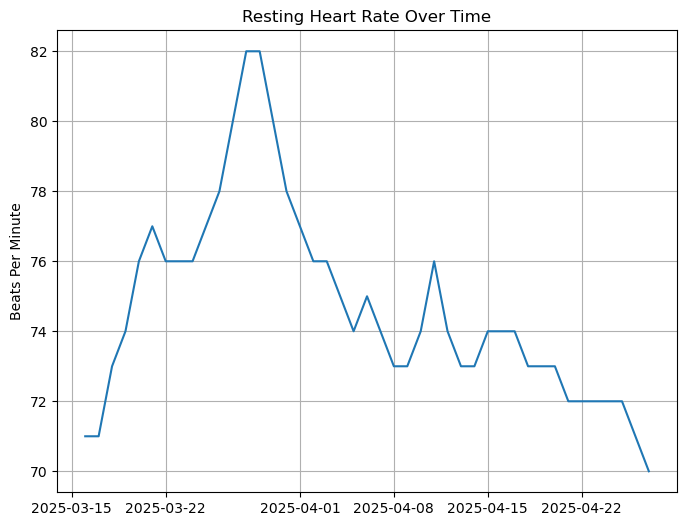

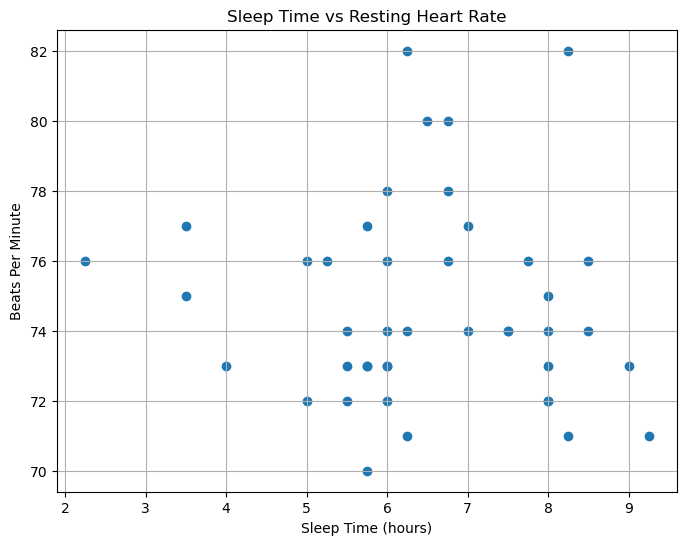

In [193]:
plt.figure(figsize=(8,6))
plt.plot(df['Date'], df['RestHR'])
plt.xlabel('')
plt.ylabel('Beats Per Minute')
plt.title('Resting Heart Rate Over Time')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(df['SleepTime'], df['RestHR'])
plt.xlabel('Sleep Time (hours)')
plt.ylabel('Beats Per Minute')
plt.title('Sleep Time vs Resting Heart Rate')
plt.grid(True)
plt.show()

### Resting Heart Rate Trends
The first plot shows `RestHR` over time across the six-week data collection period. A general downward trend can be observed, indicating improving cardiovascular recovery as the diet progressed. While some short-term variability is visible, likely reflecting day-to-day stressors, sleep variation, and training load, the overall trend shows physiological adaptation and recovery improvement. The second plot visualizes the relationship between `SleepTime` and `RestHR`. While the relationship is noisy and no strong clear pattern emerges, there is a slight visual tendency for lower `RestHR` values at higher `SleepTime`. This aligns with biological expectations, as better sleep typically supports parasympathetic recovery and lower `RestHR`. However, the spread of the data also shows that other factors beyond `SleepTime` alone likely contributed to nightly `RestHR` variation.

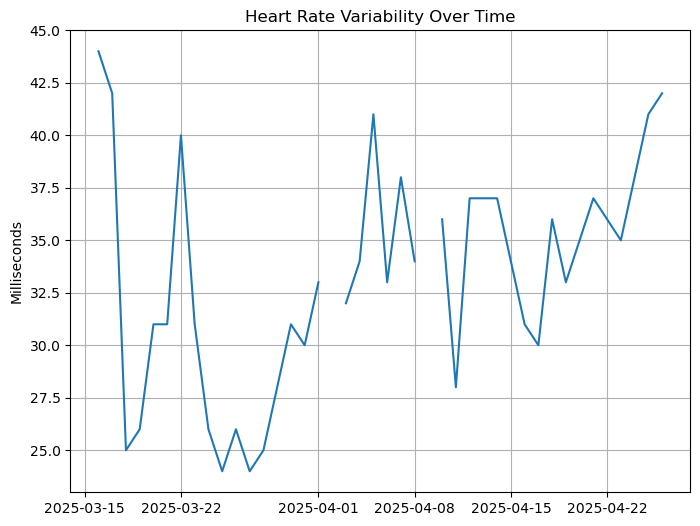

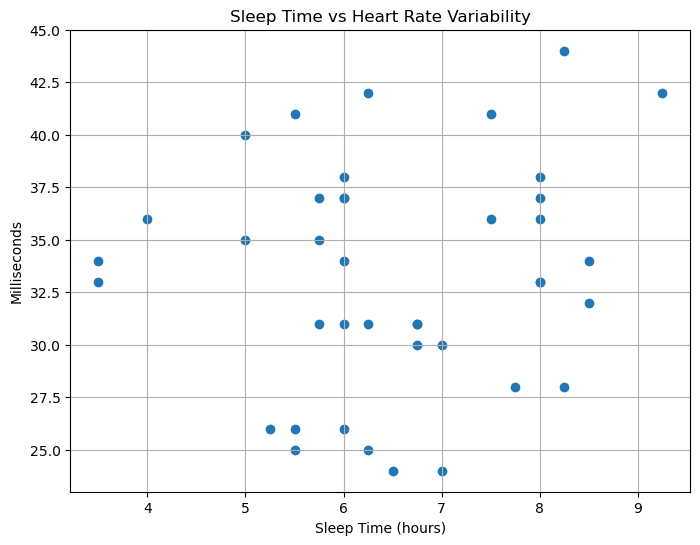

In [180]:
plt.figure(figsize=(8,6))
plt.plot(df['Date'], df['HRV'])
plt.xlabel('')
plt.ylabel('Milliseconds')
plt.title('Heart Rate Variability Over Time')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(df['SleepTime'], df['HRV'])
plt.xlabel('Sleep Time (hours)')
plt.ylabel('Milliseconds')
plt.title('Sleep Time vs Heart Rate Variability')
plt.grid(True)
plt.show()

### Heart Rate Variability Trends
The first plot shows `HRV` over time throughout the six-week data collection period. Although there is substantial daily variability, expected due to the sensitivity of `HRV` to a wide range of factors, the overall trend appears to show gradual improvement, with higher `HRV` values toward the end of the collection peroid. The second plot explores the relationship between `SleepTime` and `HRV`. Similar to the `RestHR` plots, no strong direct relationship is apparent, but there is some indication that higher `SleepTime` tends to correspond with higher `HRV` values.  This is consistent with physiological expectations, as better sleep supports autonomic recovery. However, the scatter also highlights that sleep is not the sole driver of `HRV`, and day-to-day fluctuations are influenced by multiple factors beyond `SleepTime` alone.

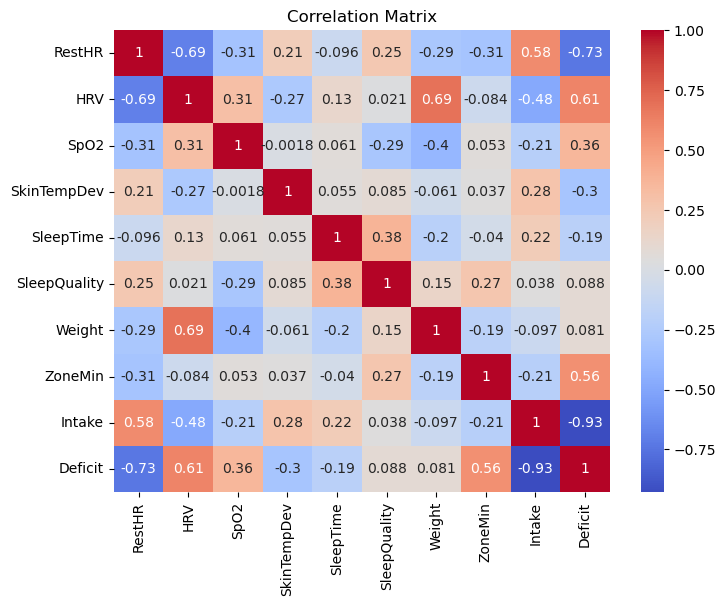

In [106]:
corr = df[['RestHR', 'HRV', 'SpO2', 'SkinTempDev', 'SleepTime', 'SleepQuality', 'Weight', 'ZoneMin', 'Intake', 'Deficit']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Correlation Analysis
The heatmap above displays the correlation coefficients between biometric and lifestyle variables. Several notable relationships emerge. `RestHR` is negatively correlated with both `HRV` and `ZoneMin`, and positively correlated with `Intake`. This is likely because lower caloric intake and higher activity are associated with better cardiovascular recovery. `HRV` shows a positive association with `Deficit`, which suggests that my calorie deficit isn't so steep as to push the nervous system into sympathetic dominance, which would drive down `HRV` and hamper recovery. `SleepQuality` correlates positively with both `ZoneMin` and `SleepTime`, suggesting that days with more physical activity and longer sleep durations tend to be followed by better subjective `SleepQuality`, which shouldn't be too surprising. `SleepTime` also shows a moderate positive correlation with `SleepQuality`, which is also to be expected. While not every night with a long `SleepTime` translates into high `SleepQuality` since there are several factors involved, it's likely that a low `SleepTime` reliably results in low `SleepQuality`. `SpO2` shows relatively weak correlations with most variables, though it trends slightly positively with `HRV` and `Deficit`. Given these observed correlations, `Intake` and `ZoneMin` were selected as predictors for modeling `RestHR` later in the analysis. Their relatively low correlation (r = -0.21) also minimizes concerns about multicollinearity, allowing for a clearer interpretation of the regression model. 

Although my initial intuition was that workout volume (`ZoneMin`) and calorie intake (`Intake`) might be modestly positively correlated, due to eating extra calories to fuel recovery, the observed data showed a weak negative correlation (r = -0.21).  This could be due to the pressures of dietary restriction outweighing post-exercise compensation, or that calorie increases after exercise were relatively modest compared to overall deficit.

In [244]:
df['LiftedYesterday'] = df['Lifted'].shift(1).fillna(0).astype(int)
df.groupby('LiftedYesterday')[['RestHR', 'HRV', 'SleepQuality']].mean()

,RestHR,HRV,SleepQuality
LiftedYesterday,,,
0,74.896552,34.259259,7.166667
1,74.285714,32.142857,7.444444


### Effect of Lifting on Recovery Metrics
Above I created a new variable, `LiftedYesterday`, by shifting the existing `Lifted` column forward by one day. This ensures that lifting sessions are matched to the following night's recovery data (`RestHR`, `HRV`, `SleepQuality`), maintaining the correct order of influence, lifting first, recovery second. After creating `LiftedYesterday`, the data is grouped based on whether lifting occurred the previous day (`0` = did not lift, `1` = did lift) and calculating the mean values of `RestHR`, `HRV`, and `SleepQuality` within each group. The resulting table shows that on days following a lifting session, the average `RestHR` was slightly lower, and `SleepQuality` was slightly higher compared to days when no lifting occurred, but these differences were relatively modest. `HRV` was slightly lower after lifting days, which could reflect residual physiological stress or recovery demands following exercise.

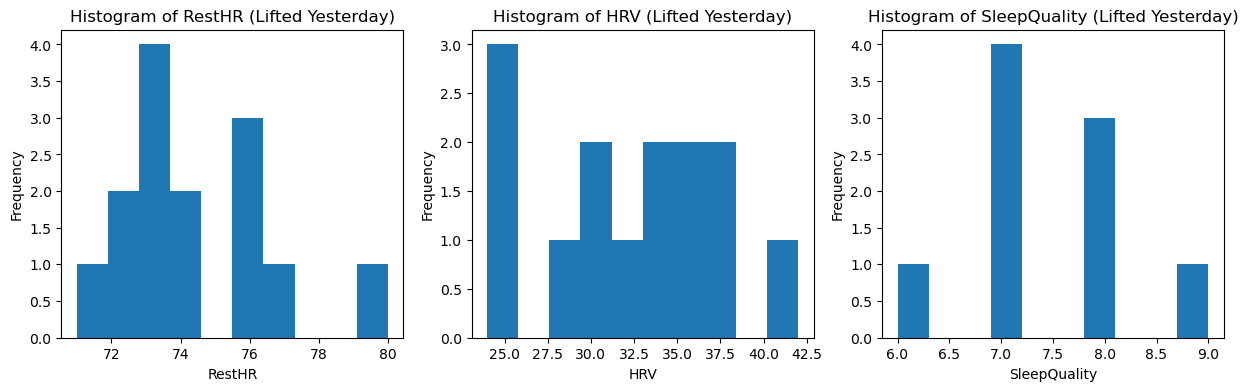

In [286]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
variables = ['RestHR', 'HRV', 'SleepQuality']

for i, var in enumerate(variables):
    group1 = df.loc[df['LiftedYesterday'] == 1, var].dropna()
    axes[i].hist(group1, bins=10)
    axes[i].set_title(f'Histogram of {var} (Lifted Yesterday)')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
plt.show()

I initially planned to conduct t-tests to formally compare `RestHR`, `HRV`, and `SleepQuality` based on whether lifting occurred the previous day, rather than relying solely on differences in group means. However, visual inspection of the histograms shows that the normality assumption is not satisfied. Because I do not yet have experience applying nonparametric methods, this remains a limitation of the current analysis. The dataset is also constrained by the fact that I currently lift only three times per week, limiting the number of usable observations. I plan to continue collecting data over time, which will allow for more robust statistical testing in future analyses.

In [154]:
df['IntakeYesterday'] = df['Intake'].shift(1)
df['ZoneMinYesterday'] = df['ZoneMin'].shift(1)

regression_data = df[['IntakeYesterday', 'ZoneMinYesterday', 'RestHR']].dropna()

X = regression_data[['IntakeYesterday', 'ZoneMinYesterday']]
X = sm.add_constant(X)
y = regression_data['RestHR']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 RestHR   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     11.10
Date:                Sat, 26 Apr 2025   Prob (F-statistic):           0.000642
Time:                        23:52:44   Log-Likelihood:                -44.251
No. Observations:                  22   AIC:                             94.50
Df Residuals:                      19   BIC:                             97.78
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               68.7932      2.463  

### Regression Analysis: Predicting Resting Heart Rate
To model the influence of behavior on overnight recovery, an Ordinary Least Squares (OLS) regression was run using `IntakeYesterday` and `ZoneMinYesterday` as predictors of `RestHR`. The shift function was applied again here for the same reason as before, for aligning predictors with the subsequent recovery outcome to maintain proper timing. Before running the model, `Intake` and `ZoneMin` were previously evaluated in the correlation matrix, and showed only a weak negative correlation (r = -0.21), minimizing concerns about multicollinearity despite the warning shown in the model output. Given the scope of this project, it seems sensible to move forward with the regression analysis.

### Model Interpretation
`IntakeYesterday` is positively associated with `RestHR`. Each additional calorie consumed yesterday predicts a slight increase in `RestHR`, holding `ZoneMin` constant. `ZoneMinYesterday` is negatively associated with `RestHR`. Greater physical activity the previous day predicts a small decrease in `RestHR`. The model explains about 54% of the variance in `RestHR` (`R-squared = 0.539`), which in my estimation is relatively good for personal biometric data over a relatively short time period. Both predictors met the threshold for statistical significance. These results show that both higher physical activity and lower calorie intake contribute independently to improved overnight cardiovascular recovery, as reflected in lower `RestHR`.

### Conclusion
This project analyzed personal biometric and lifestyle data to explore how daily behaviors, such as calorie intake, exercise, and sleep, relate to nervous system recovery indicators like resting heart rate and heart rate variability. While variability was expected given the small sample size and real-world fluctuations, general trends aligned with physiological expectations. Consistent caloric deficits and regular exercise support lower resting heart rates and higher heart rate variability over time. Although some relationships, such as between sleep and recovery metrics, were noisy, the overall findings reinforce the importance of managing sleep, nutrition, and activity together to optimize recovery. This project also emphasizes the value of structured self-tracking and data analysis in drawing actionable insights from personal health metrics.
